## 대주제 : NetFlix
### 소주제 : 월 구독료와 시장 규모의 상관관계, Device와 구독 타입의 상관관계 분석
### 선정배경 : 인기 콘텐츠에 힘입어 2분기 가입자 수 증가. 광고를 포함하는 요금제 회원이 전 분기 대비 34% 증가 / '넷플릭스'가 광고 없이 이용 가능한 가장 저렴한 요금제 '베이식 멤버십'을 미국과 프랑스에서 중단 선언 
- 데이터에서 Country, Monthly Revenue, Subscription Type, Device 컬럼 사용
- (1) Netflix 시장 규모가 큰 국가는 높은 월 구독료를 내는 이용자 비중이 높을 것 인가?
    * 국가별 사용자와 월 구독료 합계를 통해 시장 규모 파악
    * 시장 규모 상위 3개국과 하위 3개국을 비교하여 결과 종합
- (2) 사용장치와 구독 타입은 관계가 있을까?
    * 구독 타입과 주 사용 장치의 상관관계 분석

In [1]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from matplotlib import rc

In [2]:
# [2] 데이터 준비
F_DATA=r'C:\KDT\EX_PANDAS\DATAS\Netflix Userbase.csv'
# 데이터 출처 : https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data

# 적용할 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\NanumGothic.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [3]:
# [3] CSV => DataFrame으로 저장
df1=pd.read_csv(F_DATA)

In [4]:
# [4] 데이터 확인
# [4-1] 전체 데이터 확인
df1.info() # 결측치 없음 / # 익명의 넷플릭스 사용자 2500명의 개인정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
# [4-2] 국가별 사용자 데이터 확인
df1['Country'].value_counts()
# 10개의 국가가 컬럼에 존재한다

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [ ]:
# [4-3] 월 구독료 데이터 확인
df1['Monthly Revenue'].value_counts()
# 10~15달러 까지 6개의 구독료 타입?이 존재

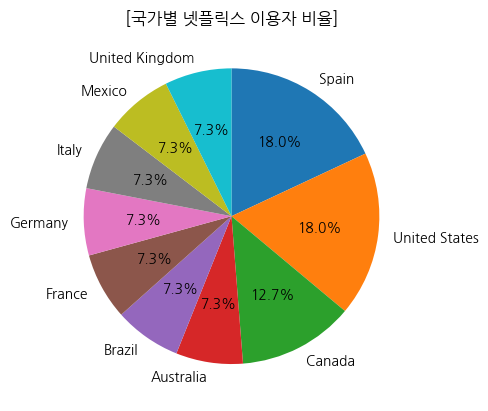

In [6]:
# [5] 데이터 시각화
# [5-1] 국가별 사용자 구성 시각화 - pie 그래프
CN=['Spain','United States','Canada','Australia','Brazil','France','Germany','Italy','Mexico','United Kingdom']
round(df1['Country'].value_counts()/df1['Country'].count(),2)
CountrySR=df1['Country'].value_counts()
x=CountrySR.index.to_list()
h=CountrySR.values.tolist()

plt.pie(h,labels=CN, autopct='%.1f%%',counterclock=False, startangle=90)
plt.title('[국가별 넷플릭스 이용자 비율]')
plt.show()

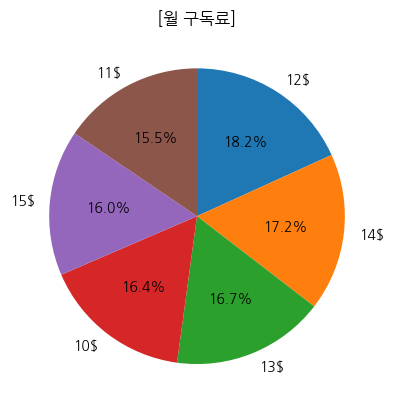

In [8]:
# [5-2] 월 구독료 정보 시각화 - pie 그래프
MR=['12$','14$','13$','10$','15$','11$']
round(df1['Monthly Revenue'].value_counts()/df1['Monthly Revenue'].count(),2)
CountrySR=df1['Monthly Revenue'].value_counts()
x=CountrySR.index.to_list()
h=CountrySR.values.tolist()

plt.pie(h,labels=MR, autopct='%.1f%%',counterclock=False, startangle=90)
plt.title('[월 구독료]')
plt.show()

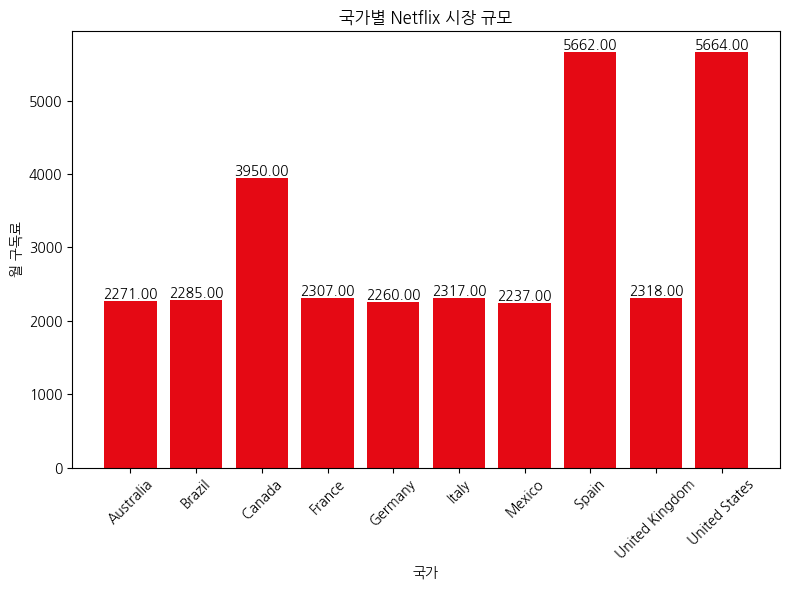

In [9]:
# [5-3] 국가별 Netflix 시장 규모 시각화 - bar 그래프

# 그룹 연산으로 사용자와 월 구독료 합계 구하기
country_revenue=df1.groupby('Country')['Monthly Revenue'].sum().reset_index()
    
plt.figure(figsize=(8,6))
bar=plt.bar(country_revenue['Country'], country_revenue['Monthly Revenue'], color='#E50914')
plt.xlabel('국가')
plt.ylabel('월 구독료')
plt.title('국가별 Netflix 시장 규모')
plt.xticks(rotation=45)
plt.tight_layout()

# 비슷한 크기의 bar를 갖는 국가가 많아서 구독료 합계 수치도 표기
for b1 in bar:
    mr=b1.get_height()
    plt.text(b1.get_x()+b1.get_width()/2.0, mr, f'{mr:.2f}', ha='center', va='bottom')

plt.show()

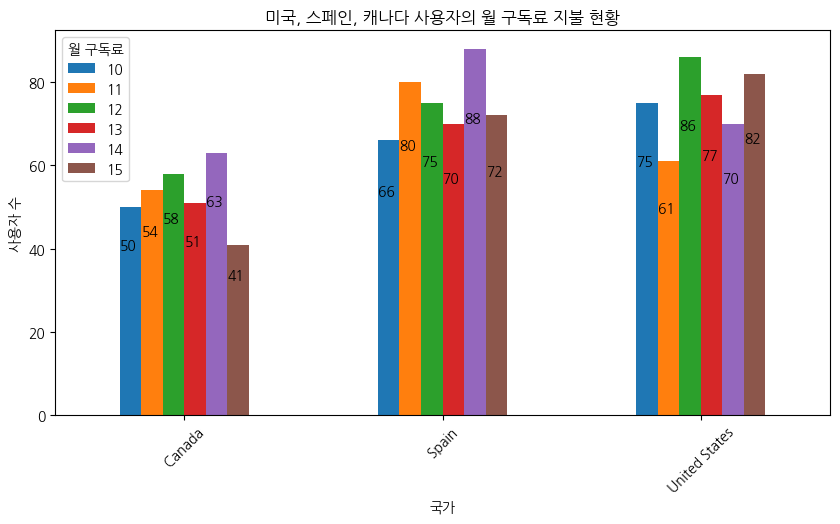

In [10]:
# [5-3] 국가별 월 구독료 지불 데이터 시각화 - 다중 bar 그래프

# 시장 규모 상위 3개 국가인 미국, 스페인, 캐나다를 대상으로 함

# 미국, 스페인, 캐나다의 월 구독료 데이터를 추출한 변수
filtered_data1=df1[df1['Country'].isin(['United States', 'Spain', 'Canada'])]
filtered_data1=filtered_data1[filtered_data1['Monthly Revenue'].isin([10,11,12,13,14,15])]

pivot_table=filtered_data1.pivot_table(index='Country', columns='Monthly Revenue', aggfunc='size', fill_value=0)

ax=pivot_table.plot(kind='bar', figsize=(10,5))

# 가시성을 위해 사용자 수를 수치화 하여 그래프에 추가
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 0.8))

plt.title('미국, 스페인, 캐나다 사용자의 월 구독료 지불 현황')
plt.xlabel('국가')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)
plt.legend(title='월 구독료')

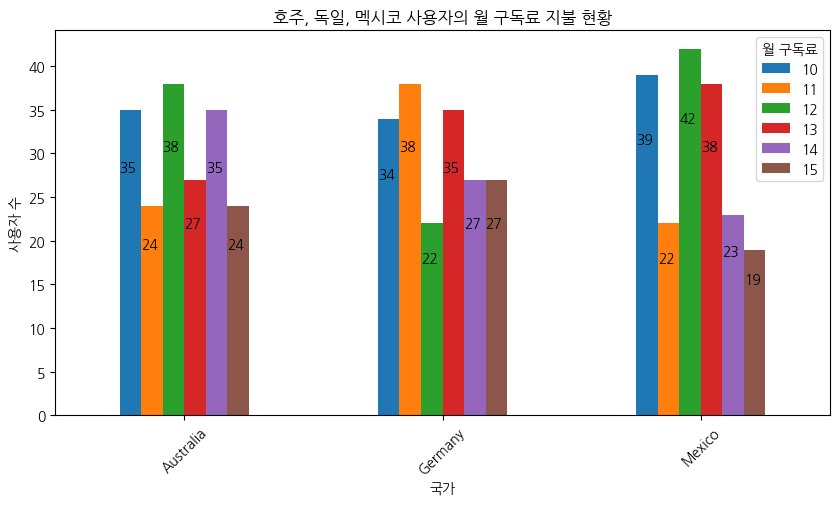

In [11]:
# [5-3] 국가별 월 구독료 지불 데이터 시각화 - 다중 bar 그래프

# 시장 규모 하위 3개 국가인 호주, 독일, 멕시코를 대상으로 함

# 호주, 독일, 멕시코의 월 구독료 데이터를 추출한 변수
filtered_data2=df1[df1['Country'].isin(['Australia', 'Germany', 'Mexico'])]
filtered_data2=filtered_data2[filtered_data2['Monthly Revenue'].isin([10,11,12,13,14,15])]

pivot_table=filtered_data2.pivot_table(index='Country', columns='Monthly Revenue', aggfunc='size', fill_value=0)

ax=pivot_table.plot(kind='bar', figsize=(10,5))

# 가시성을 위해 사용자 수를 수치화 하여 그래프에 추가
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 0.8))

plt.title('호주, 독일, 멕시코 사용자의 월 구독료 지불 현황')
plt.xlabel('국가')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)
plt.legend(title='월 구독료')

#### 시장규모 상위 3개국
- 'United States' : 451명 중 152명이 14~15달러의 월 구독료 지불 => 약 33.7%
- 'Spain' : 451명 중 160명이 14~15달러의 월 구독료 지불 => 약 35.4%
- 'Canada' : 317명 중 104명이 14~15달러의 월 구독료 지불 => 약 32.8%

#### 시장규모 하위 3개국
- 'Germany' : 183명 중 54명이 14~15달러의 월 구독료 지불 => 약 29.5%
- 'Australia' : 183명 중 59명이 14~15달러의 월 구독료 지불 => 약 32.2%
- 'Mexico' : 183명 중 42명이 14~15달러의 월 구독료 지불 => 약 22.9%

### 분석결과
- 시장 규모 상위 3개국은 하위 3개국보다 14~15달러의 월 구독료를 내는 사용자 비율이 높으나 차이가 크진 않다.
- 시장 규모가 큰 국가는 작은 국가에 비해 비싼 금액의 구독료를 지불하는 사용자 비중이 확연히 높을 것으로 추측했으나 기대에 미치지 않음.

In [12]:
# 국가별 구독 방식 확인
df1['Subscription Type'].value_counts()
# 3개의 구독 방식이 컬럼에 존재한다

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

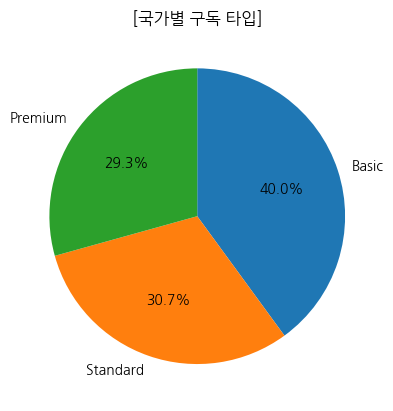

In [13]:
# 국가별 구독 방식 시각화 - pie 그래프
ST=['Basic','Standard','Premium']
round(df1['Subscription Type'].value_counts()/df1['Subscription Type'].count(),2)
STypeSR=df1['Subscription Type'].value_counts()
x=STypeSR.index.to_list()
h=STypeSR.values.tolist()

plt.pie(h,labels=ST, autopct='%.1f%%',counterclock=False, startangle=90)
plt.title('[국가별 구독 타입]')
plt.show()

In [14]:
# 국가별 Device 확인
df1['Device'].value_counts()
# 4개의 주 사용장치가 컬럼에 존재한다

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

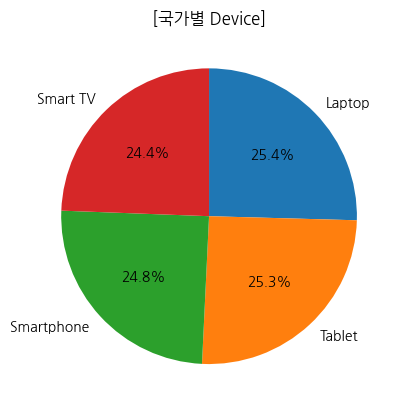

In [15]:
# 국가별 주 사용장치 - pie 그래프
Dv=['Laptop','Tablet','Smartphone','Smart TV']
round(df1['Device'].value_counts()/df1['Device'].count(),2)
DvSR=df1['Device'].value_counts()
x=DvSR.index.to_list()
h=DvSR.values.tolist()

plt.pie(h,labels=Dv, autopct='%.1f%%',counterclock=False, startangle=90)
plt.title('[국가별 Device]')
plt.show()

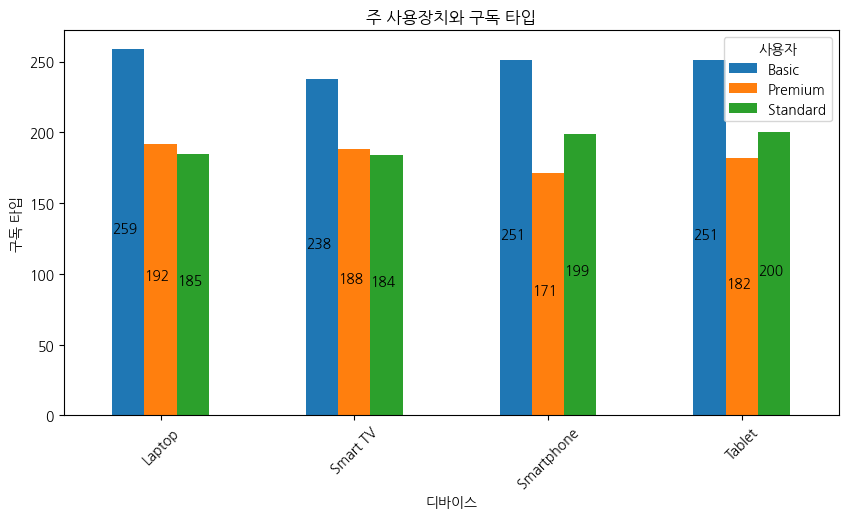

In [17]:
# 주 사용장치와 구독 타입 시각화 - 다중 막대 그래프

# 디바이스와 구독 타입 데이터 추출
filtered_data3=df1[df1['Device'].isin(['Laptop','Tablet','Smartphone','Smart TV'])]
filtered_data3=filtered_data3[filtered_data3['Subscription Type'].isin(['Basic','Standard','Premium'])]

pivot_table=filtered_data3.pivot_table(index='Device', columns='Subscription Type', aggfunc='size', fill_value=0)

ax=pivot_table.plot(kind='bar', figsize=(10,5))

# 가시성을 위해 사용자 수를 수치화 하여 그래프에 추가
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 0.5))

plt.title('주 사용장치와 구독 타입')
plt.xlabel('디바이스')
plt.ylabel('구독 타입')
plt.xticks(rotation=45)
plt.legend(title='사용자')

### 분석결과
- 주 사용장치 종류('Laptop','Tablet','Smartphone','Smart TV')에 관계 없이 비슷한 양상의 구독 타입을 보여준다

### 최종 결론
- (1) Netflix 시장 규모가 큰 국가는 높은 월 구독료를 내는 이용자 비중이 높을 것 인가?
    * 시장 규모 상위 3개국은 하위 3개국보다 14~15달러의 월 구독료를 내는 사용자 비율이 높으나 차이가 크진 않다.
    * 시장 규모가 큰 국가는 작은 국가에 비해 높은 금액의 구독료를 지불하는 사용자 비중이 확연히 높을 것으로 추측했으나 기대에 미치지 않음.
- (2) 사용장치와 구독 타입은 관계가 있을까?
    * 주 사용장치 종류에 관계 없이 비슷한 양상의 구독 타입을 보여준다.
- (종합) : Netflix 이용자들은 Monthly Revenue, Subscription Type, Device 속성과 무관히 개성적인 사용 행태를 보인다.
           Netflix에서 basic 요금제를 없애려하는데 basic 요금제 삭제 이후의 Subscription Type 데이터를 구할 수 있으면 이전과 이후의 비교를 해보고 싶다.